<a href="https://colab.research.google.com/github/divyanshpillai/Implementing-Linear_Regression-from-Scratch/blob/main/Implementing_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

**Y = wX + b**

Y = Dependent Variable

X = Independent Variable

w = weight

b = bias

**Gradient Descent**

w = w - α*dw

b = b - α*db

In [1]:
import numpy as np

In [24]:
class LinearRegression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # number of training examples (row) and number of features (column)
    self.m, self.n = X.shape

    # initializing the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight(self):
    Y_prediction = self.predict(self.X)

    # calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction))/self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self, X):
    return X.dot(self.w)+self.b

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Data Preprocessing

In [8]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [9]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
salary_data.shape

(30, 2)

In [11]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
X = salary_data.drop(columns='Salary', axis=1)
Y = salary_data['Salary']

In [13]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [14]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Trainig the Linear Regression Model

In [25]:
model = LinearRegression(learning_rate = 0.02, no_of_iterations = 1000)

In [26]:
model.fit(X_train, Y_train)

In [27]:
print('weight - ', model.w[0])
print('bias - ', model.b)

weight -  9570.888860991548
bias -  24384.029598697263


y = wx + b

y = 9570(x) + 24384

salary = 9570(experience) + 24384

Predict the salary value for test data

In [28]:
test_data_prediction = model.predict(X_test)

In [29]:
print(test_data_prediction)

1     36826.185118
0     34912.007346
14    67453.029473
9     59796.318384
21    92337.340512
19    81809.362765
dtype: float64


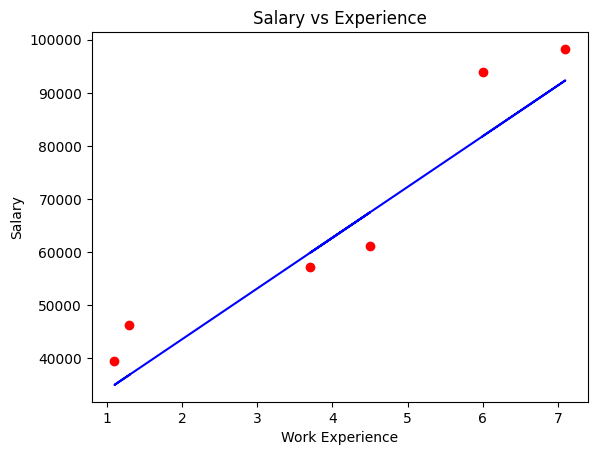

In [30]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()